## Retail Price Optimisation

In [13]:
# import libraries for data mining
import numpy as np 
import pandas as pd

# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# library properties
pd.set_option("display.max_columns", 30)
sns.set_theme()

In [15]:
retail = pd.read_csv("retail_price.csv")

### Descriptive Analysis

In [16]:
retail.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [17]:
retail.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,9750,4.4,57,23,8,1,5,2017,0.649351,12600,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,9750,4.4,61,22,8,1,6,2017,6.493506,12600,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,4.4,123,21,10,1,7,2017,38.311688,12600,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,4.4,90,23,8,1,8,2017,33.766234,12600,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,9750,4.4,54,21,9,1,9,2017,20.779221,12600,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [18]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [19]:
retail.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,21.773669,8.658284,1.494083,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,0.986104,0.705600,0.940430,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,20.000000,8.000000,0.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,21.000000,8.000000,1.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,22.000000,9.000000,1.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,23.000000,9.000000,2.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,23.000000,10.000000,4.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [20]:
retail.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

### Data Preprocessing

In [21]:
# identify nullvalues
retail.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [22]:
# identify duplicated values
retail.duplicated().sum()

0

In [23]:
# identify whitespaces
retail[retail["product_id"].str.isspace()].sum()

product_id                      0
product_category_name           0
month_year                      0
qty                             0
total_price                   0.0
freight_price                 0.0
unit_price                    0.0
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_score                 0.0
customers                       0
weekday                         0
weekend                         0
holiday                         0
month                           0
year                            0
s                             0.0
volume                          0
comp_1                        0.0
ps1                           0.0
fp1                           0.0
comp_2                        0.0
ps2                           0.0
fp2                           0.0
comp_3                        0.0
ps3                           0.0
fp3                           0.0
lag_price     

In [24]:
# modify feature names
retail = retail.rename(columns={"month_year":"invoice_date", "qty":"quantity"})

### EDA: Feature Selection

In [25]:
retail

,product_id,product_category_name,invoice_date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,9750,4.4,57,23,8,1,5,2017,0.649351,12600,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,9750,4.4,61,22,8,1,6,2017,6.493506,12600,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,4.4,123,21,10,1,7,2017,38.311688,12600,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,4.4,90,23,8,1,8,2017,33.766234,12600,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [26]:
retail.columns

Index(['product_id', 'product_category_name', 'invoice_date', 'quantity',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [27]:
# select feature from product_id till year
retail = retail[['product_id', 'product_category_name', 'invoice_date', 'quantity',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year']].copy()

In [28]:
retail

,product_id,product_category_name,invoice_date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,350,4.0,57,23,8,1,5,2017
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,350,4.0,61,22,8,1,6,2017
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,350,4.0,123,21,10,1,7,2017
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,350,4.0,90,23,8,1,8,2017
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,350,4.0,54,21,9,1,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,9750,4.4,57,23,8,1,5,2017
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,9750,4.4,61,22,8,1,6,2017
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,9750,4.4,123,21,10,1,7,2017
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,9750,4.4,90,23,8,1,8,2017


### Univariate Analysis

Hypothetical questions for optimising retail prices: Case Study in 2018
+ How does the price evolve in the year 2018?
+ What are the main factors that influence price data?
+ Which products are being sold the highest in 2018?
+ What will be the predicted price for future sales? 

General Distribution for Price and Quantity

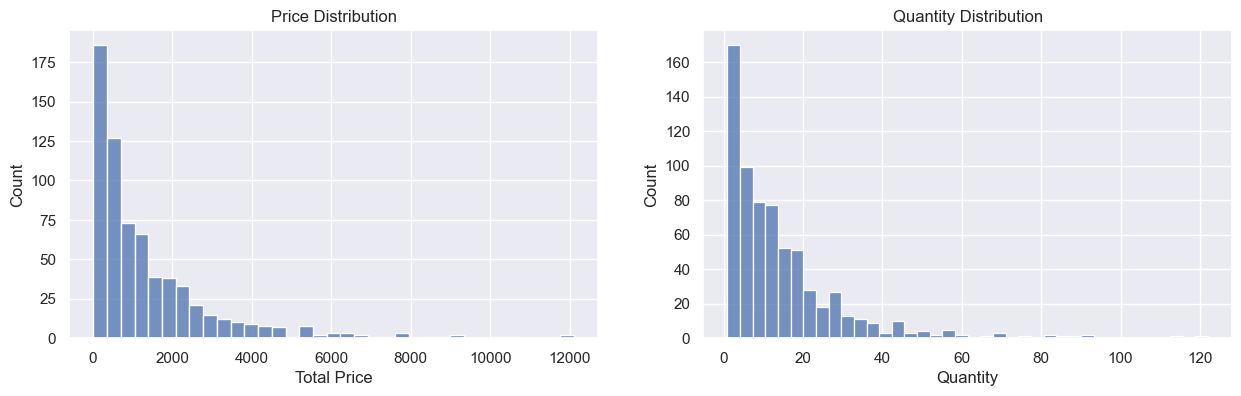

In [29]:
# distribution of price and quantity along time
fig, hist = plt.subplots(1,2, figsize=(15,4))
hist1 = sns.histplot(data=retail, x="total_price", ax=hist[0])
hist2 = sns.histplot(data=retail, x="quantity", ax=hist[1])

# histogram 1: description
hist1.set_xlabel("Total Price")
hist1.set_title("Price Distribution")

# histogram 2: description
hist2.set_xlabel("Quantity")
hist2.set_title("Quantity Distribution")

# show histogram
plt.show()


+ Price evolution in 2018

In [30]:
retail_yr18 = retail[retail["year"] == 2018]
retail_yr18.head()

,product_id,product_category_name,invoice_date,quantity,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.99,39,161,2,350,4.0,62,23,8,2,1,2018
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.99,39,161,2,350,4.0,62,20,8,2,2,2018
10,bed1,bed_bath_table,01-03-2018,17,679.83,16.462353,39.99,39,161,2,350,4.0,43,22,9,1,3,2018
11,bed1,bed_bath_table,01-04-2018,13,519.87,14.236154,39.99,39,161,2,350,4.0,34,21,9,1,4,2018
12,bed1,bed_bath_table,01-05-2018,19,759.81,10.256316,39.99,39,161,2,350,4.0,57,23,8,3,5,2018


In [31]:
retail_yr18.columns

Index(['product_id', 'product_category_name', 'invoice_date', 'quantity',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year'],
      dtype='object')

In [32]:
# feature selection for this problem
kpi_metrics1 = ['product_id', 'product_category_name', 'invoice_date', 'quantity',
       'total_price', 'freight_price', 'unit_price',
       'product_score', 'customers', 'month',
       'year']

retail_yr18 = retail_yr18[kpi_metrics1]
retail_yr18

,product_id,product_category_name,invoice_date,quantity,total_price,freight_price,unit_price,product_score,customers,month,year
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.99,4.0,62,1,2018
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.99,4.0,62,2,2018
10,bed1,bed_bath_table,01-03-2018,17,679.83,16.462353,39.99,4.0,43,3,2018
11,bed1,bed_bath_table,01-04-2018,13,519.87,14.236154,39.99,4.0,34,4,2018
12,bed1,bed_bath_table,01-05-2018,19,759.81,10.256316,39.99,4.0,57,5,2018
...,...,...,...,...,...,...,...,...,...,...,...
666,bed4,bed_bath_table,01-03-2018,8,383.20,15.226250,47.90,4.2,43,3,2018
667,bed4,bed_bath_table,01-04-2018,7,335.30,19.084286,47.90,4.2,34,4,2018
668,bed4,bed_bath_table,01-05-2018,2,95.80,12.055000,47.90,4.2,57,5,2018
669,bed4,bed_bath_table,01-06-2018,4,191.60,12.637500,47.90,4.2,43,6,2018


In [33]:
# grouping data by taking the sum of all total price per each transaction
price_data_18 = retail_yr18.groupby("invoice_date")[["total_price","freight_price","quantity"]].sum()
price_data_18 = price_data_18.reset_index()
price_data_18["invoice_date"] = price_data_18["invoice_date"].transform(lambda x: x.replace("-2018",""))
price_data_18

,invoice_date,total_price,freight_price,quantity
0,01-01,77569.62,1005.187059,866
1,01-02,88275.95,958.114994,869
2,01-03,85049.85,1181.647087,824
3,01-04,75977.18,975.096029,760
4,01-05,91223.46,653.449657,898
5,01-06,50438.94,962.164587,474
6,01-07,46053.15,966.149595,427
7,01-08,37579.67,900.882944,333


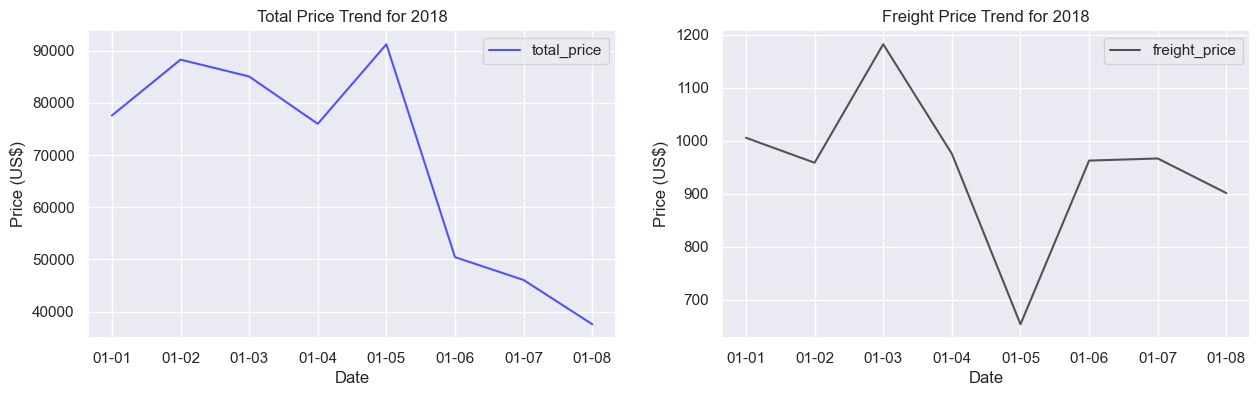

In [34]:
# visualise total price data along invoice data using line chart
img, trend = plt.subplots(1,2, figsize=(15,4))
trend1 = price_data_18.plot(kind="line", x="invoice_date",y="total_price",ax=trend[0], color="blue", alpha=0.65)
trend2 = price_data_18.plot(kind="line", x="invoice_date",y="freight_price", ax=trend[1], color="black", alpha=0.65)

# add description for trend 1 and 2
for trend in [trend1, trend2]:
  trend.set_xlabel("Date")
  trend.set_ylabel("Price (US$)")

trend1.set_title("Total Price Trend for 2018")
trend2.set_title("Freight Price Trend for 2018")

# show graphs
plt.show()

In [35]:
price01_56 = price_data_18[(price_data_18["invoice_date"] >= "01-05" ) & (price_data_18["invoice_date"] <= "01-06")]
price01_56

,invoice_date,total_price,freight_price,quantity
4,01-05,91223.46,653.449657,898
5,01-06,50438.94,962.164587,474


In [36]:
def price_drop(data, price_name):
  data[price_name]

In [37]:
# total price
price1 = price_data_18["total_price"].max()
price2 = price_data_18.loc[5,"total_price"]

fprice1 = price01_56["freight_price"][4]
fprice2 = price01_56["freight_price"][5]

# calculate price drop between 01-05 and 01-06
price_change = price2-price1
fprice_change = fprice2-price1
print(f"Price drop for month of May 2018: {price_change:.3f} US$ in loss")
print(f"Freight price increase for month of May 2018: {fprice_change:.3f} US$ in profit")

Price drop for month of May 2018: -40784.520 US$ in loss
Freight price increase for month of May 2018: -90261.295 US$ in profit


Trend 1 shows the total price of all merchandise between 01-01 and 01-08 in contrast with trend 2 showing the freight price of the sold products. According to this first step of the analysis process, the total price of all merchandises exposes itself an horrific downfall with a loss of 40784.52 US$ between 01-05 and 01-06. On the contrary, the retail company encounters a tremendous performance with an increase of -90261.295 US$ in profit. 

The essential step is finding the root cause of the excessive decline in the total price of all merchandise by the company. This will be taken into consideration for further analysis. Herefore, making the correlation between other KPIs which might affect the price evolution for this period is the utmost suited approach to investigate the causation of this issue. 

### Correlation Analysis: Finding main factors of the problem

+ problem: the decrease of total price in the month May
+ Period of this problem: 01-05 and 01-06

In [38]:
retail.columns

Index(['product_id', 'product_category_name', 'invoice_date', 'quantity',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year'],
      dtype='object')

In [39]:
kpi_metrics2 = [
  #"invoice_date",
  "quantity",'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'total_price']
retail_data2 = retail[kpi_metrics2]
retail_data2

,quantity,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,total_price
0,1,161,2,350,4.0,57,45.95
1,3,161,2,350,4.0,61,137.85
2,6,161,2,350,4.0,123,275.70
3,4,161,2,350,4.0,90,183.80
4,2,161,2,350,4.0,54,91.90
...,...,...,...,...,...,...,...
671,1,162,5,9750,4.4,57,215.00
672,10,162,5,9750,4.4,61,2090.00
673,59,162,5,9750,4.4,123,12095.00
674,52,162,5,9750,4.4,90,10375.00


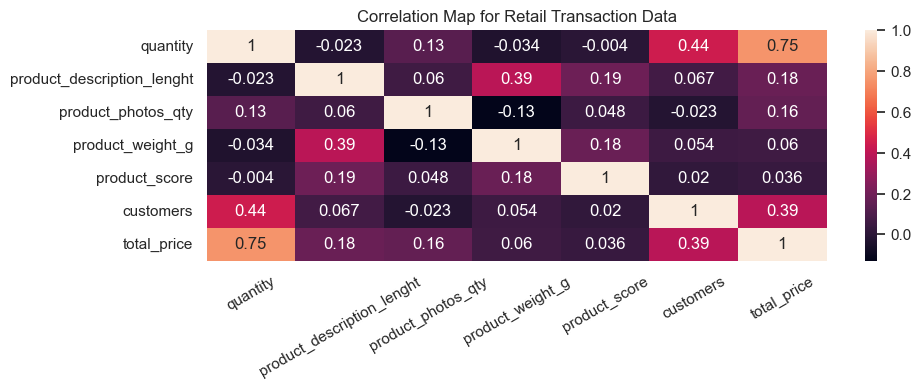

In [40]:
# correlation map
retail_corr = retail_data2.corr()
fig = plt.figure(figsize=(10,3))
sns.heatmap(retail_corr, annot=True)

# correlation map: layout
plt.title("Correlation Map for Retail Transaction Data")
plt.xticks(rotation = 30)
plt.show()

Possible features that could generate a highly positive correlations are total price, quantity and customers. Here, 2 correlations from these feature will be distinguished and utilised in further analysis on the cause of the total price. Total price is considered as the target variable of this business problem because we are interested in finding the best price for the products. 

Correlations among features are: 
+ Correlation 1: quantity vs total price
+ Correlation 2: customers vs quantity
+ Correlation 3: customers vs total price

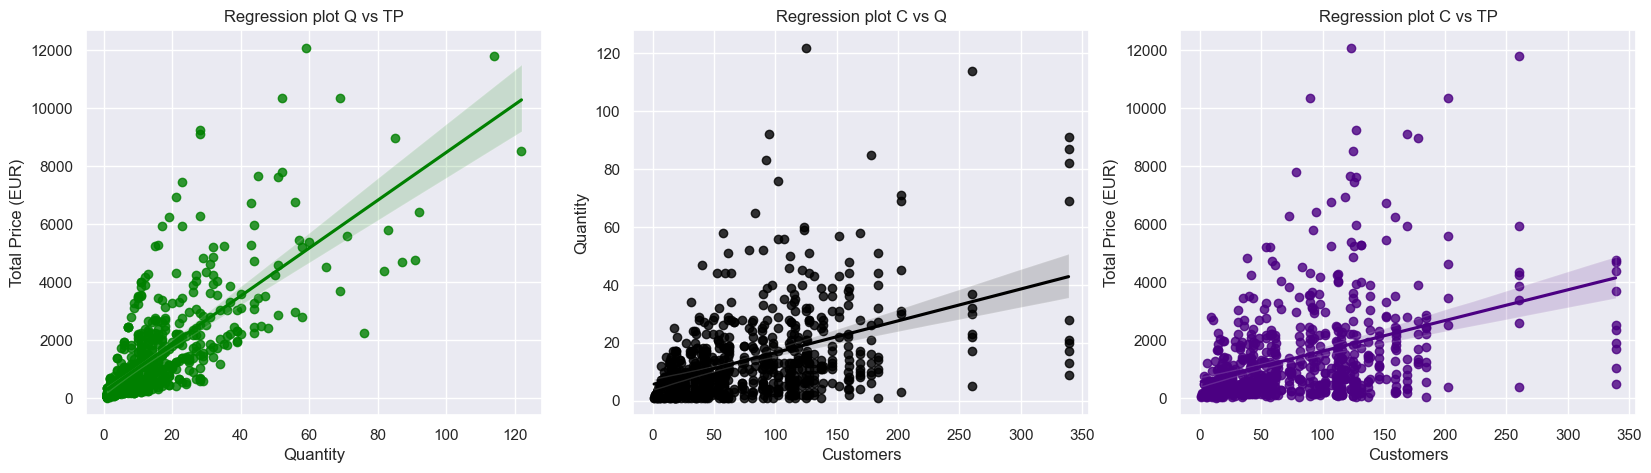

In [41]:
# correlation 1
fig, regr = plt.subplots(1,3, figsize=(20,5))
regr1 = sns.regplot(data=retail_data2, x="quantity", y="total_price", ax=regr[0], color="green", label="QT Regression")
regr2 = sns.regplot(data=retail_data2, x="customers", y="quantity", ax=regr[1], color="black", label="CQ Regression")
regr3 = sns.regplot(data=retail_data2, x="customers", y="total_price", ax=regr[2], color="indigo", label="CT Regression")

# regression plot 1: description
regr1.set_xlabel("Quantity")
regr1.set_ylabel("Total Price (EUR)")
regr1.set_title("Regression plot Q vs TP")

# regression plot 1: description
regr2.set_xlabel("Customers")
regr2.set_ylabel("Quantity")
regr2.set_title("Regression plot C vs Q")

# regression plot 1: description
regr3.set_xlabel("Customers")
regr3.set_ylabel("Total Price (EUR)")
regr3.set_title("Regression plot C vs TP")

# display regression plot
# sns.move_legend(regr1, "lower center")
plt.show()

From the correlation analysis the factors Customers and Quantity influence the retail total price in 2018. As long as the quantity increases through time, the total price increases simultaneously. That leads for an increase in customer's behaviour whereby the price will be expected to be high. To correlate the total price of all sold products with the customer, notice that the number of custoemrs increased gradually as quantity of products have been sold more in the year. This causes that the total price augements its value as customer's behaviour is on its increment. 

+ Which products are being sold the highest in 2018?

In [42]:
retail_yr18["product_id"].value_counts()

product_id
bed1          8
bed3          8
garden3       8
furniture4    8
watches8      8
health5       8
bed2          8
watches4      8
perfumery2    8
watches3      8
furniture2    8
garden9       8
garden8       8
garden2       8
watches2      8
furniture1    8
garden6       8
health2       8
computers6    8
garden10      8
garden1       8
garden4       8
health8       8
computers4    8
health3       8
health4       8
watches1      8
garden7       8
computers2    8
health7       8
watches7      7
furniture3    7
computers1    7
bed4          7
health10      7
health9       7
watches6      7
health6       7
consoles1     6
perfumery1    6
computers5    6
cool3         6
watches5      5
health1       4
consoles2     4
cool1         4
cool5         4
cool4         4
cool2         4
garden5       4
computers3    2
Name: count, dtype: int64

In [43]:
ben = "furniture4"
ben[:len(ben)-1]

'furniture'

In [44]:
retail_yr18["product_id"].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4'], dtype=object)

In [45]:
# preprocess data on the product_id column
remove_digits = lambda text: text[:len(text)-1]
retail_yr18["product_id"] = retail_yr18["product_id"].apply(remove_digits)

# group quantity by product_id
product_qgr18 = retail_yr18.groupby("product_id")[["quantity"]].sum()
product_qgr18 = product_qgr18.reset_index().sort_values(by="quantity", ascending=False)

In [55]:
product_qgr18.index = np.arange(0,product_qgr18.shape[0])
product_qgr18

,product_id,quantity
0,watches,1056
1,health,1086
2,computers,923
3,garden,1006
4,furniture,649
5,bed,367
6,cool,192
7,garden1,172
8,health1,155
9,perfumery,124


In [52]:
# preprocess on value garen1 and health1
garden = product_qgr18.loc[7,["quantity"]] + product_qgr18.loc[3, ["quantity"]]
health = product_qgr18.loc[8, ["quantity"]] + product_qgr18.loc[1,["quantity"]] 

# assign garden and health to data
product_qgr18.loc[3, ["quantity"]] = garden
product_qgr18.loc[1,["quantity"]] = health

# delete record garden1 and health1 + reindex the dataframe 
product_qgr18 = product_qgr18.drop(index=[7,8], axis=0).sort_values(by="quantity", ascending=False)
product_qgr18.index = np.arange(0,product_qgr18.shape[0]) 

In [69]:
product_qgr18 = product_qgr18.sort_values(by="quantity", ascending=False)

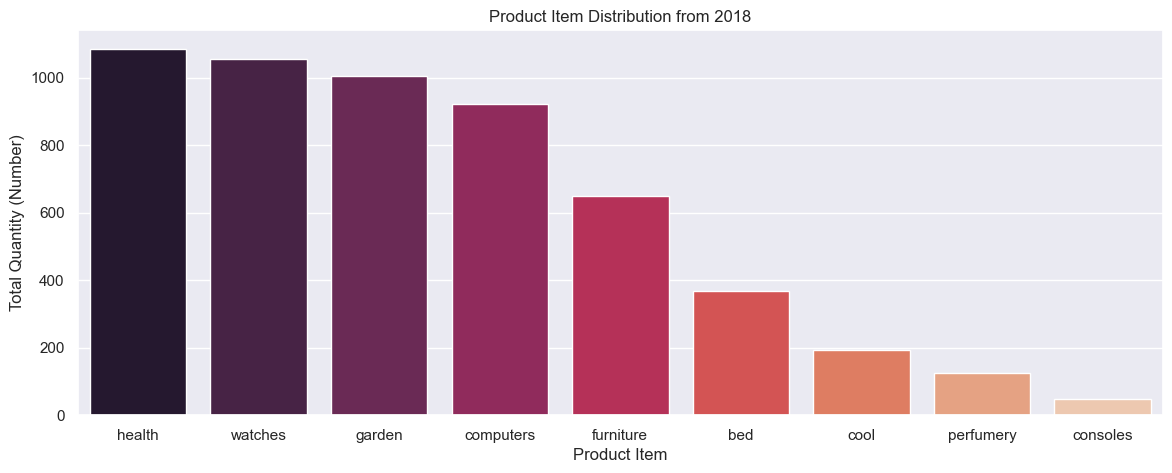

In [72]:
# visualise total quantity per item 
plt.figure(figsize=(14,5))
sns.barplot(data=product_qgr18, x="product_id", y="quantity",hue="product_id", palette="rocket")

# barplot: description
plt.xlabel("Product Item")
plt.ylabel("Total Quantity (Number)")
plt.title("Product Item Distribution from 2018")
plt.show()

### Linear Regression Modelling

In order to predict total price value on each product items, a linear regression model is required to be build based on the features customer and quantity. The selection fo these feature allows to fit the data more perfectly which can also be used for future data. Because the dataset contains a numerous amount of sample points that might cause outliers and anomalies, splitting data into training and testing set will be appriorate to make better estimation on the data. Moreover, the model needs an appropriate evaluation on the data to increase accurary and model quality. 

In [144]:
# import machine learning algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validation

ImportError: cannot import name 'cross_validation' from 'sklearn.model_selection' (c:\Users\mian_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\__init__.py)

Features for making linear regression modeling:
+ Customer vs Total Price
+ Quantity vs Total Price

#### Linear Regression Modelling 1: Customer vs Total Price

In [99]:
# split data into train and testing sets
X = retail_data2[["customers"]]
Y = retail_data2["total_price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [100]:
# size of the test and training datasets
xtrain_sh = X_train.shape
xtest_sh = X_test.shape
ytrain_sh = Y_train.shape
ytest_sh = Y_test.shape

print(f" Size of X Training set: {xtrain_sh}")
print(f" Size of X Testing set: {xtest_sh}")
print(f" Size of Y Training set: {ytrain_sh}")
print(f" Size of Y Testing set: {ytest_sh}")

 Size of X Training set: (540, 1)
 Size of X Testing set: (136, 1)
 Size of Y Training set: (540,)
 Size of Y Testing set: (136,)


In [101]:
# create linear model that fits the data
reg_model1 = LinearRegression()
reg_model1.fit(X_train, Y_train)

LinearRegression()

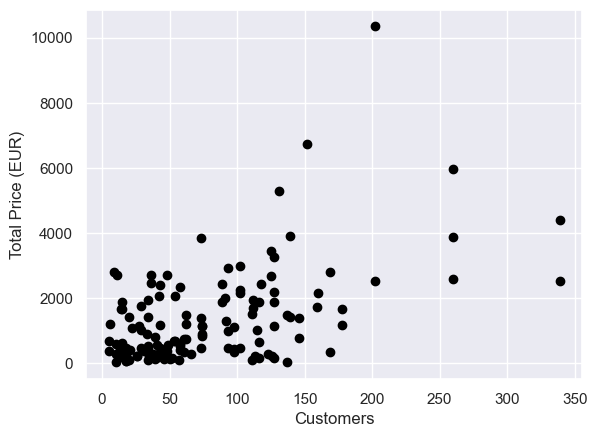

In [112]:
# visualise dataplot 
plt.scatter(X_test, Y_test, color="black")
plt.xlabel("Customers")
plt.ylabel("Total Price (EUR)")
plt.show()

In [89]:
# retrieve coefficients + intercepts
model_coef = reg_model1.coef_
model_ic = reg_model1.intercept_

print(f"Model Coefficient: {model_coef}")
print(f"Model Intercept: {model_ic}")

Model Coefficient: [10.43397799]
Model Intercept: 615.6766090114713


In [107]:
# predict price value
price_pred = reg_model1.predict(X_test)

Text(0, 0.5, 'Total Price (EUR)')

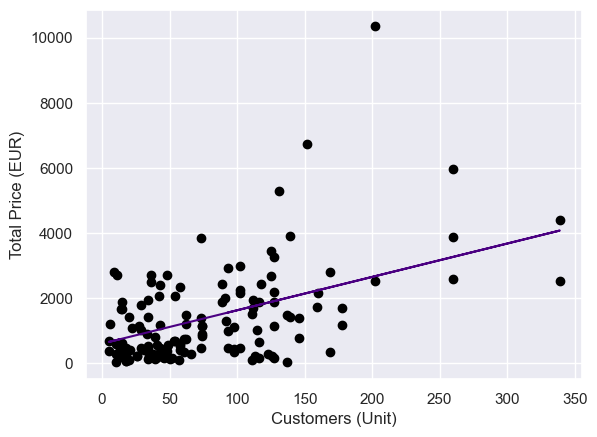

In [142]:
# visualise linear regression graph for price prediction
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, price_pred, color="indigo")
plt.xlabel("Customers (Unit)")
plt.ylabel("Total Price (EUR)")

In [ ]:
# calculating the accuracy of the model


#### Linear Regression Modelling 2: Quantity vs Total Price

In [114]:
# split data into train and test data sets
X = retail_data2[["quantity"]]
Y = retail_data2["total_price"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.25, random_state = 25)

In [115]:
# create linear regression model 2: quantity vs total price
reg_model2 = LinearRegression()
reg_model2.fit(Xtrain, Ytrain)

LinearRegression()

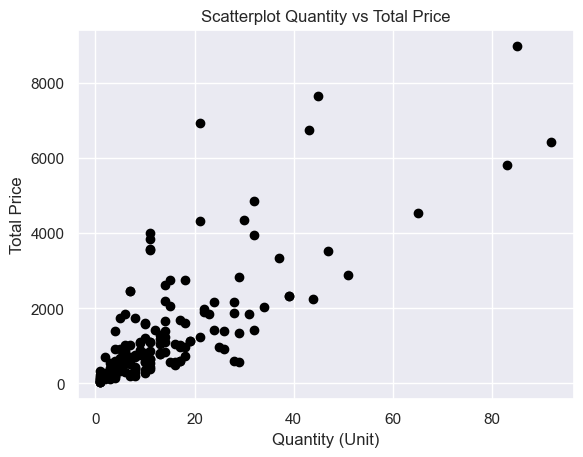

In [141]:
# create scatterplot
plt.scatter(Xtest, Ytest, color="black")
plt.xlabel("Quantity (Unit)")
plt.ylabel("Total Price")
plt.title("Scatterplot Quantity vs Total Price")
plt.show()

In [116]:
# retrieve data from training model: coefficients + intercept
model_coef2 = reg_model2.coef_
model_ic2 = reg_model2.intercept_

print(f"coefficient of Model 2: {model_coef2}")
print(f"intercept of Model 2: {model_ic2}")

coefficient of Model 2: [83.64829395]
intercept of Model 2: 234.6916862499845


In [117]:
# predict price data on testing set
price_pred2 = reg_model2.predict(Xtest)

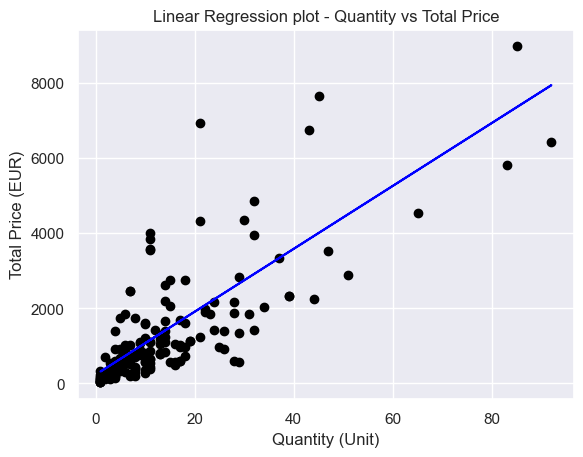

In [140]:
# visualise linear regression model
plt.scatter(Xtest, Ytest, color="black")
plt.plot(Xtest, price_pred2, color="blue")
plt.xlabel("Quantity (Unit)")
plt.ylabel("Total Price (EUR)")
plt.title("Linear Regression plot - Quantity vs Total Price")
plt.show()

In [ ]:
# calculating the score of the model ->

#### Linear Regression: Summary

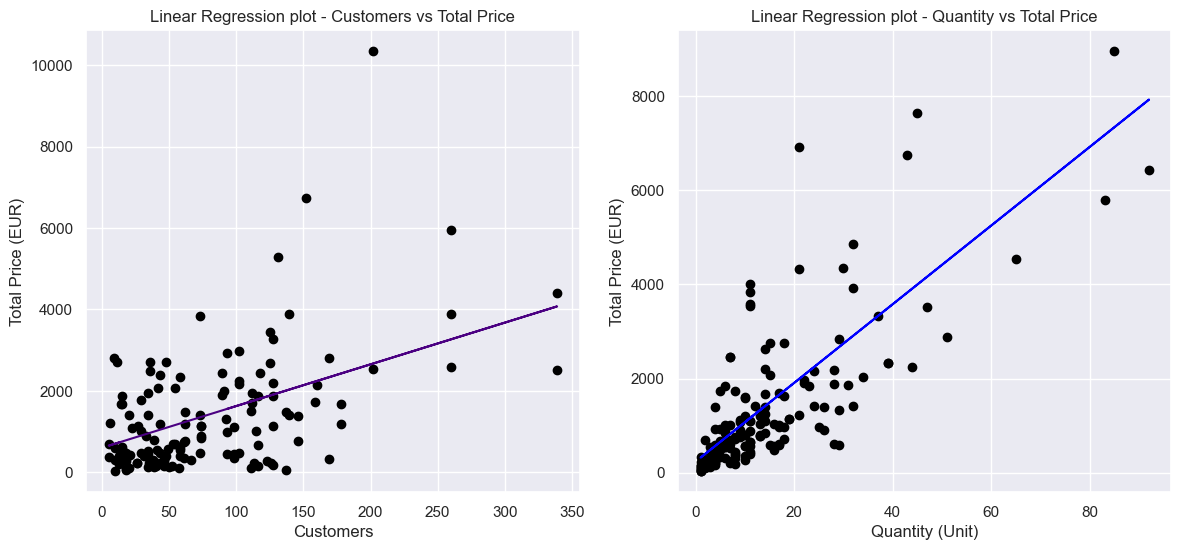

In [139]:
# visualise linear regression graph for price prediction
fig, reg = plt.subplots(1,2, figsize=(14,6))

linreg1 = reg[0].scatter(X_test, Y_test, color="black")
reg[0].plot(X_test, price_pred, color="indigo")
reg[0].set_xlabel("Customers")
reg[0].set_ylabel("Total Price (EUR)")
reg[0].set_title("Linear Regression plot - Customers vs Total Price")

# visualise linear regression model
linreg2 = reg[1].scatter(Xtest, Ytest, color="black")
linreg2 = reg[1].plot(Xtest, price_pred2, color="blue")
plt.xlabel("Quantity (Unit)")
plt.ylabel("Total Price (EUR)")
plt.title("Linear Regression plot - Quantity vs Total Price")
plt.show()

Linear Regression Model 1:

Model 1 represents the correlation between customers and total price of sales. The coefficient of the model of approx. 10.43 EUR/Customer which shows a positive correlation among both feature. The initial total price value is approx 615.7 EUR considered as the intercept of the graph. In this model, there are noises that needed to be filtered out by optimising the model and detecting outliers for further use. 

Linear Regression Model 2: 

the relationship between the quantity of the product item sold by retail industries and the title price is described by linear regression model 2. As long as quantity increases with time, an expedient increase of total price has occured with a coefficent of 83.64 EUR/Unit which is obviously 8 times the amount of model 1. The retail industry has an initial total price of 234.7 EUR when no customers have advanced their purchase action. 

Conclusion: The best total price for future sales will be 10.43 EUR that a customer is required to pay off and 83.64 EUR for each unit. 